In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


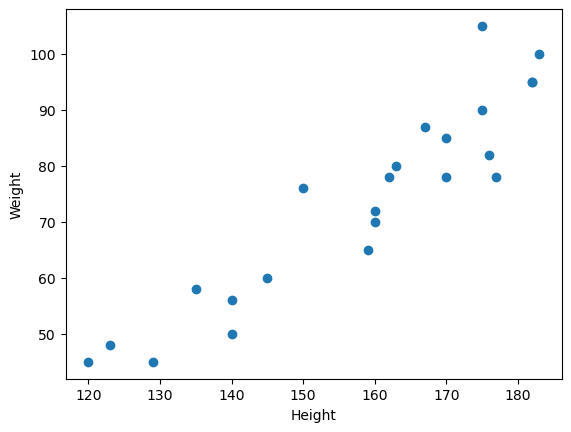

In [3]:
# scatter plot
plt.scatter(df.Height, df.Weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [4]:
X = df[['Weight']]
y = df['Height']
#explanation for above line: X is a 2D array (dataframe) and y is a 1D array (series)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#explanation for why we are using standard scaler: to bring all the features to the same scale

In [7]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
#explanation why we are fitting the model: to learn the relationship between X and y

LinearRegression()

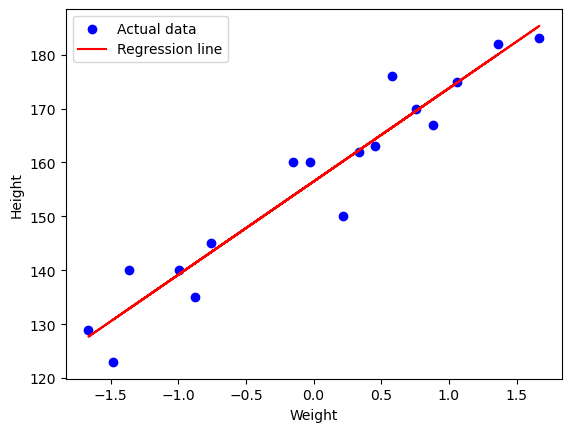

In [8]:
plt.scatter(X_train, y_train, color='blue', label='Actual data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()

In [9]:
#prediction for test data
y_pred = model.predict(X_test)
print(y_pred)

[162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]


In [10]:
print("Model Coefficient (slope):", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficient (slope): [17.2982057]
Model Intercept: 156.47058823529412


In [11]:
# formula for prediction: Height = (slope * Weight) + intercept
# write the formula in terms of python code
def predict_height(weight):
    return (model.coef_[0] * weight) + model.intercept_
# test the function
print(predict_height(150))  # example weight

2751.201443889754


In [12]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}')

MAE: 9.665125886795005, MSE: 114.84069295228699, RMSE: 10.716374991212605, R²: 0.7360826717981276


In [ ]:
model.predict([[200]]) # we forgot to standardize the input data

array([3616.11172911])

In [16]:
model.predict(scaler.transform([[200]])) # we standardized the input data

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([290.11185046])